In [1]:
import cv2
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np
import scipy.io

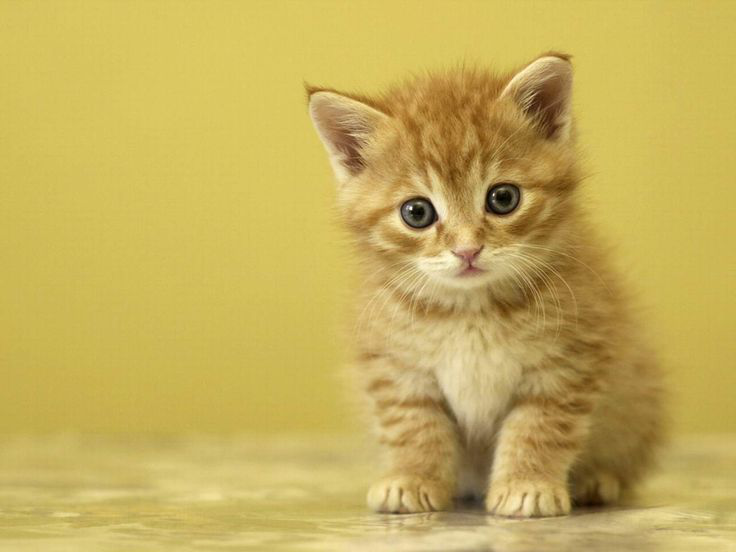

In [2]:
#open the original image
img = Image.open('cat.jpg') 
img

Text(0.5, 1.0, 'Noised Image')

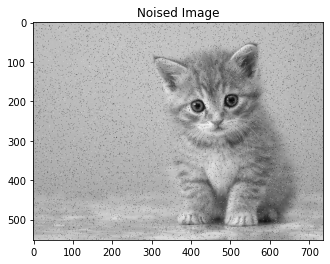

In [4]:
#salt and pepper (noise) filter
def add_noise(img):
    
    row,col = img.shape
     
    num_of_pixels = random.randint(300, 10000) #randomly select pixs with randint func
    for i in range(num_of_pixels):
       
        y_coord=random.randint(0, row - 1)  #random y 
     
        x_coord=random.randint(0, col - 1)  #random x 
         
        img[y_coord][x_coord] = 255    #color pixel to white
         
    # Randomly selecting some pixels
    
    num_of_pixels = random.randint(300 , 10000)
    for i in range(num_of_pixels):
       
        y_coord=random.randint(0, row - 1) #random y
         
        x_coord=random.randint(0, col - 1) #random x 
         
        img[y_coord][x_coord] = 0  #color pixel to black
        
                 
    return img
 
img = cv2.imread('cat.jpg',cv2.IMREAD_GRAYSCALE) #read image
 
img2= cv2.imwrite('saltcat.jpg',add_noise(img)) #write image

img3=cv2.imread('saltcat.jpg')

plt.imshow(img3) #display the noised image
plt.title("Noised Image") #add title




Text(0.5, 1.0, 'Lined Image')

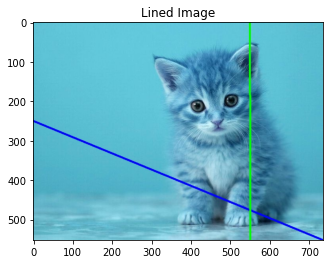

In [16]:
image = cv2.imread('cat.jpg')
 
height = image.shape[0]
width = image.shape[1]

#adding lines to the image 
cv2.line(image, (0,250), (width,height), (0,0,255), 3)
cv2.line(image, (550,0), (height,width), (0,255,0), 3)
 

img2= cv2.imwrite('strap_cat.jpg',image)
img3= cv2.imread('strap_cat.jpg')

plt.imshow(img3)
plt.title("Lined Image")#add title

Text(0.5, 1.0, 'Blurred Image')

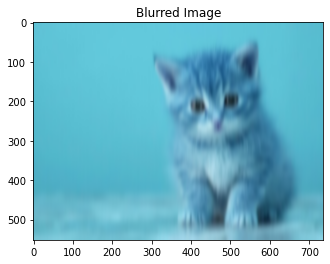

In [20]:
#Add Gaussian blur to image
image = cv2.imread("cat.jpg")

blurred_cat = cv2.GaussianBlur(image,(5,55),0) #blur the img

image2 = cv2.imwrite('blurredcat.jpg',blurred_cat) #write img

plt.imshow(blurred_cat)
plt.title("Blurred Image") #add title


In [21]:
#Calculate the SNR (signal to noise ratio) of the Gaussian image

def snr(a, axis=0, ddof=0): #create snr func
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

snr(blurred_cat)

array([[10.30267088, 26.02398484, 32.1546942 ],
       [10.32270227, 25.96320303, 31.88411311],
       [10.30037782, 25.75635289, 31.38480925],
       ...,
       [ 7.51849496, 23.99893969, 30.70691822],
       [ 7.52487029, 24.02648   , 30.6005442 ],
       [ 7.50443764, 24.02724228, 30.74752803]])

Text(0.5, 1.0, 'Smoothed Image')

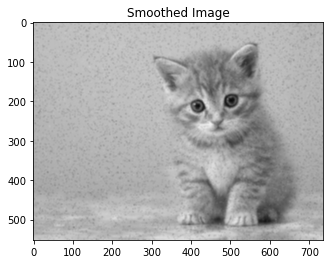

In [22]:
#Use smoothing method on the noised image

image = cv2.imread('saltcat.jpg', cv2.IMREAD_UNCHANGED)  #read image
 
# apply guassian blur on source image
finalimg = cv2.GaussianBlur(image,(5,5),cv2.BORDER_DEFAULT)
 

img = cv2.imwrite('smoothed_cat.jpg',finalimg) #write img
img2 = cv2.imread("smoothed_cat.jpg") #read img

plt.imshow(img2) 
plt.title("Smoothed Image") #add title